<a href="https://colab.research.google.com/github/nakanoelio/i2a2-challenge-petr4-trad-sys/blob/main/I2A2_PETR4_ARIMA_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt


import yfinance as yf

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMAResults


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
stock_ticker = 'PETR4.SA'
start_date = '2015-11-30'
end_date = '2021-5-27'

yf_petr4 = yf.Ticker(stock_ticker)
df_petr4 = yf_petr4.history(start=start_date, end=end_date)

In [ ]:
def series_graph(df_series, column_name):
    df_series_diff = df_series[column_name].diff().dropna()
    fig, ax = plt.subplots(2, sharex=True)
    df_series[column_name].plot(title = f"{stock_ticker}'s stock price", ax=ax[0])
    df_series_diff.plot(ax=ax[1], title='First Differences',figsize=(20,10))

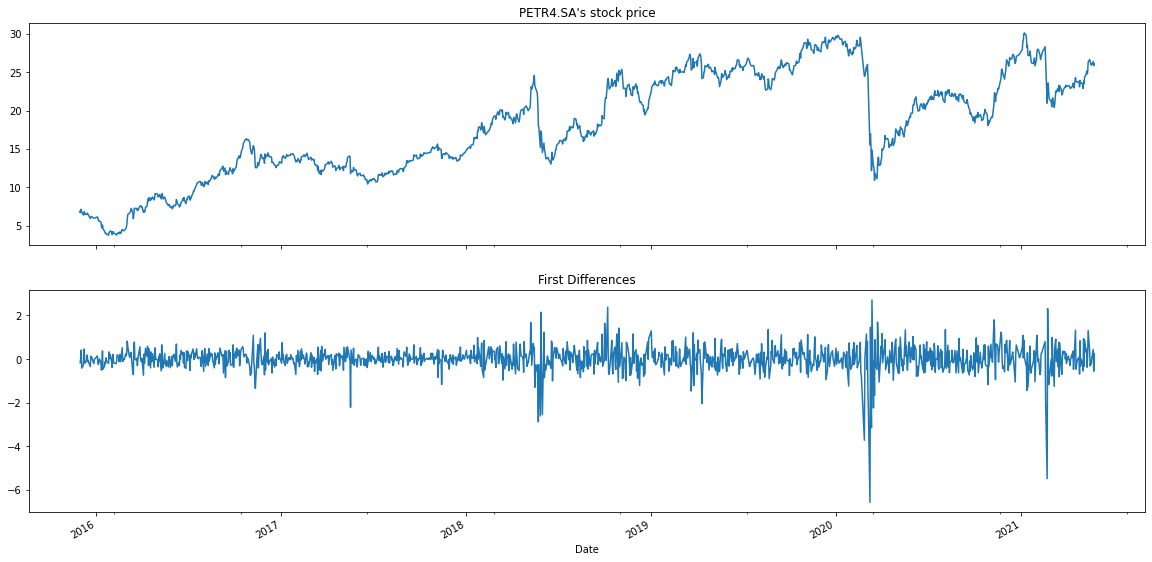

In [ ]:
series_graph(df_petr4, "Close")

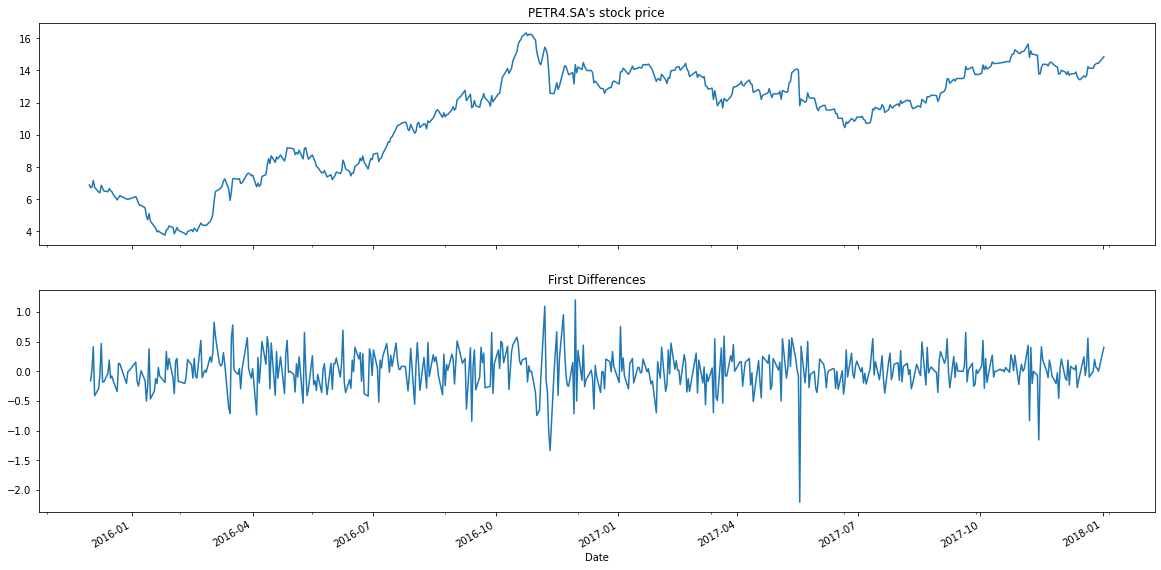

In [ ]:
series_graph(df_petr4.iloc[:525], "Close")

In [ ]:
def adf_test(df_series):
    print ('Results of Dickey-Fuller Test:')
    df_test = adfuller(df_series, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
       df_output['Critical Value (%s)'%key] = value
    print (df_output)

In [ ]:
adf_test(df_petr4["Close"])

Results of Dickey-Fuller Test:
Test Statistic                   -2.042260
p-value                           0.268356
#Lags Used                       12.000000
Number of Observations Used    1347.000000
Critical Value (1%)              -3.435214
Critical Value (5%)              -2.863688
Critical Value (10%)             -2.567914
dtype: float64


In [ ]:
adf_test(df_petr4["Close"].iloc[:525])

Results of Dickey-Fuller Test:
Test Statistic                  -1.251464
p-value                          0.651075
#Lags Used                       1.000000
Number of Observations Used    523.000000
Critical Value (1%)             -3.442915
Critical Value (5%)             -2.867082
Critical Value (10%)            -2.569722
dtype: float64


In [ ]:
def acf_pacf(df_series):
    fig = plt.figure(figsize=(12,10))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(df_series.values.squeeze(), lags=100, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(df_series, lags=40, ax=ax2)

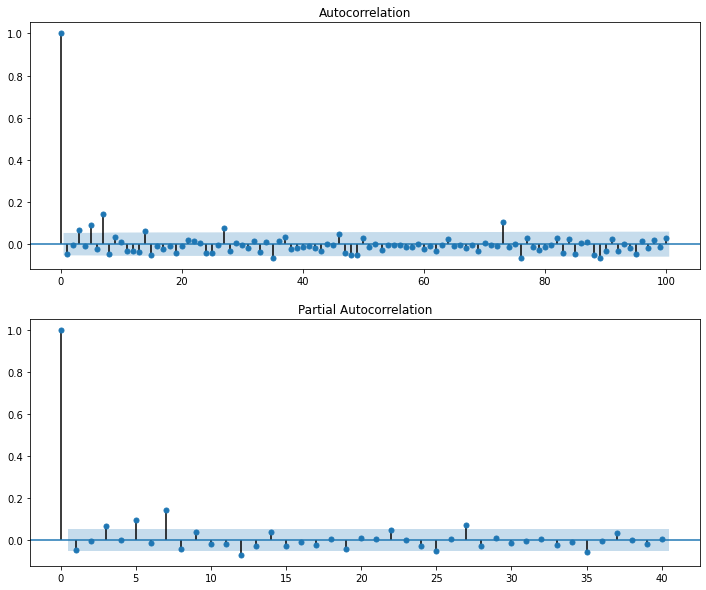

In [ ]:
acf_pacf(df_petr4["Close"].diff().dropna())

In [ ]:
acf_pacf(df_petr4["Close"].iloc[:525].diff().dropna())

In [ ]:
arima_model_1 = ARIMA(df_petr4["Close"], order=(1, 1, 1))
arima_model_fit_1 = arima_model_1.fit()
print(arima_model_fit_1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1359
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1146.331
Method:                       css-mle   S.D. of innovations              0.562
Date:                Tue, 01 Jun 2021   AIC                           2302.662
Time:                        20:36:27   BIC                           2328.734
Sample:                             1   HQIC                          2312.423
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.014      0.997      0.319      -0.014       0.042
ar.L1.D.Close    -0.9066      0.046    -19.867      0.000      -0.996      -0.817
ar.L2.D.Close    -0.0982      0.028     

In [ ]:
arima_model = ARIMA(df_petr4["Close"].iloc[:525], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  524
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -145.324
Method:                       css-mle   S.D. of innovations              0.319
Date:                Tue, 01 Jun 2021   AIC                            298.649
Time:                        20:20:01   BIC                            315.695
Sample:                             1   HQIC                           305.324
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0152      0.013      1.152      0.250      -0.011       0.041
ar.L1.D.Close    -0.2547      0.377     -0.676      0.499      -0.993       0.483
ma.L1.D.Close     0.1861      0.381     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
